 1. Load the data

In [107]:
# Importing necessary libraries again due to the reset
import pandas as pd

# Load the Titanic training dataset again
file_path_titanic = 'train.csv'
titanic_data = pd.read_csv(file_path_titanic)

# Show the first few rows of the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#data exploration

PassengerId: Un identifiant unique pour chaque passager.
Survived: Indique si le passager a survécu (1) ou non (0).
Pclass: Classe du billet du passager (1, 2, ou 3).
Name: Nom du passager.
Sex: Sexe du passager.
Age: Âge du passager.
SibSp: Nombre de frères et sœurs ou conjoints à bord.
Parch: Nombre de parents ou d'enfants à bord.
Ticket: Numéro du billet.
Fare: Tarif du billet.
Cabin: Numéro de la cabine.
Embarked: Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).


Convertir les données catégorielles en numériques (comme la colonne Sex).
Gérer les valeurs manquantes (comme dans la colonne Age).

In [108]:
# Check for missing values in the selected columns
selected_columns = ['Sex', 'Age', 'SibSp', 'Cabin']
titanic_data[selected_columns].isnull().sum()


Sex        0
Age      177
SibSp      0
Cabin    687
dtype: int64

Supprimer les lignes contenant des valeurs manquantes.

In [109]:
# Drop rows with missing values in the 'Age' column
#titanic_data_clean = titanic_data.dropna(subset=['Age'])

# Check the shape of the cleaned data
#titanic_data_clean.shape


In [110]:
# Check for missing values in the selected columns
# Fill missing values in 'Age' with the median age
from sklearn.preprocessing import LabelEncoder
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Create a new binary column for 'Cabin' indicating if the cabin is known (1) or not (0)
titanic_data['Cabin_Known'] = titanic_data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Convert 'Sex' to numerical values: 'male' as 1 and 'female' as 0
#titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})
#or use LabelEncoder
le = LabelEncoder()
# Fit and transform the 'Sex' column
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
# Display the first few rows to verify the changes
titanic_data[['Sex', 'Age', 'SibSp', 'Cabin', 'Cabin_Known']].head()


,Sex,Age,SibSp,Cabin,Cabin_Known
0,1,22.0,1,NaN,0
1,0,38.0,1,C85,1
2,0,26.0,0,NaN,0
3,0,35.0,1,C123,1
4,1,35.0,0,NaN,0


In [111]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Known
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


Maintenant, passons à la division de l'ensemble de données en ensembles d'apprentissage et de test, suivi de la normalisation des caractéristiques.

In [112]:
# Importing necessary libraries for data splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selected features and target variable
X = titanic_data[['Sex', 'Age', 'SibSp', 'Cabin_Known']]
y = titanic_data['Survived']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the training and test sets
X_train_scaled.shape, X_test_scaled.shape


((712, 4), (179, 4))

In [113]:
# Importing KNeighborsClassifier and accuracy_score from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with k=9
knn_titanic = KNeighborsClassifier(n_neighbors=9)

# Fit the model on the scaled training data
knn_titanic.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_titanic = knn_titanic.predict(X_test_scaled)

# Calculate the accuracy of the model on the test set
accuracy_titanic = accuracy_score(y_test, y_pred_titanic)
accuracy_titanic


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8100558659217877

Le modèle KNN a obtenu une précision d'environ 81% sur l'ensemble de test pour l'ensemble de données du Titanic. Cela signifie que le modèle a été assez précis pour prédire si un passager a survécu ou non sur la base des caractéristiques choisies (Sex, Age, SibSp, et Cabin_Known).

C'est un bon point de départ, mais il y a des opportunités pour l'optimisation du modèle, comme le choix d'une valeur différente pour
K, l'ingénierie des caractéristiques ou l'application d'autres techniques de prétraitement des données.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

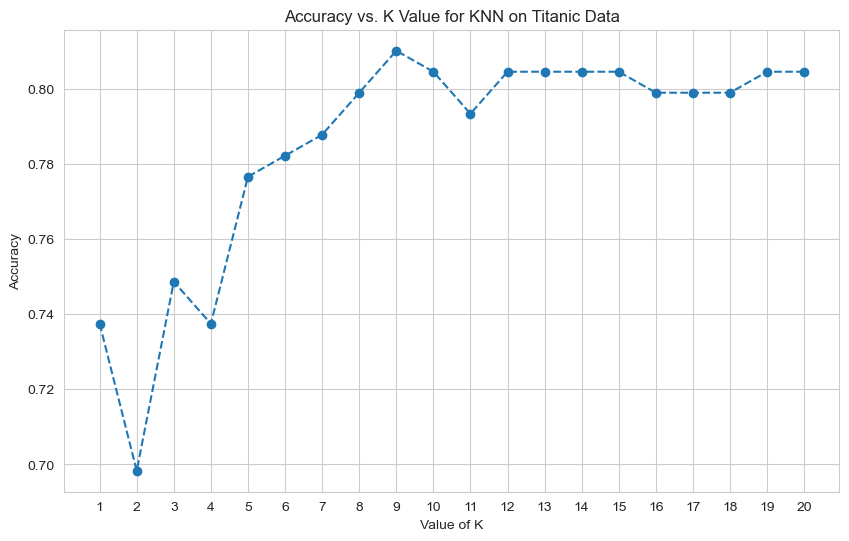

(9, 0.8100558659217877)

In [114]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Initialize variables to store results
k_values = range(1, 21)
accuracies = []

# Loop over various k values and record accuracy
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    accuracies.append(accuracy_temp)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value for KNN on Titanic Data')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Displaying the k value that resulted in the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
best_k, best_accuracy


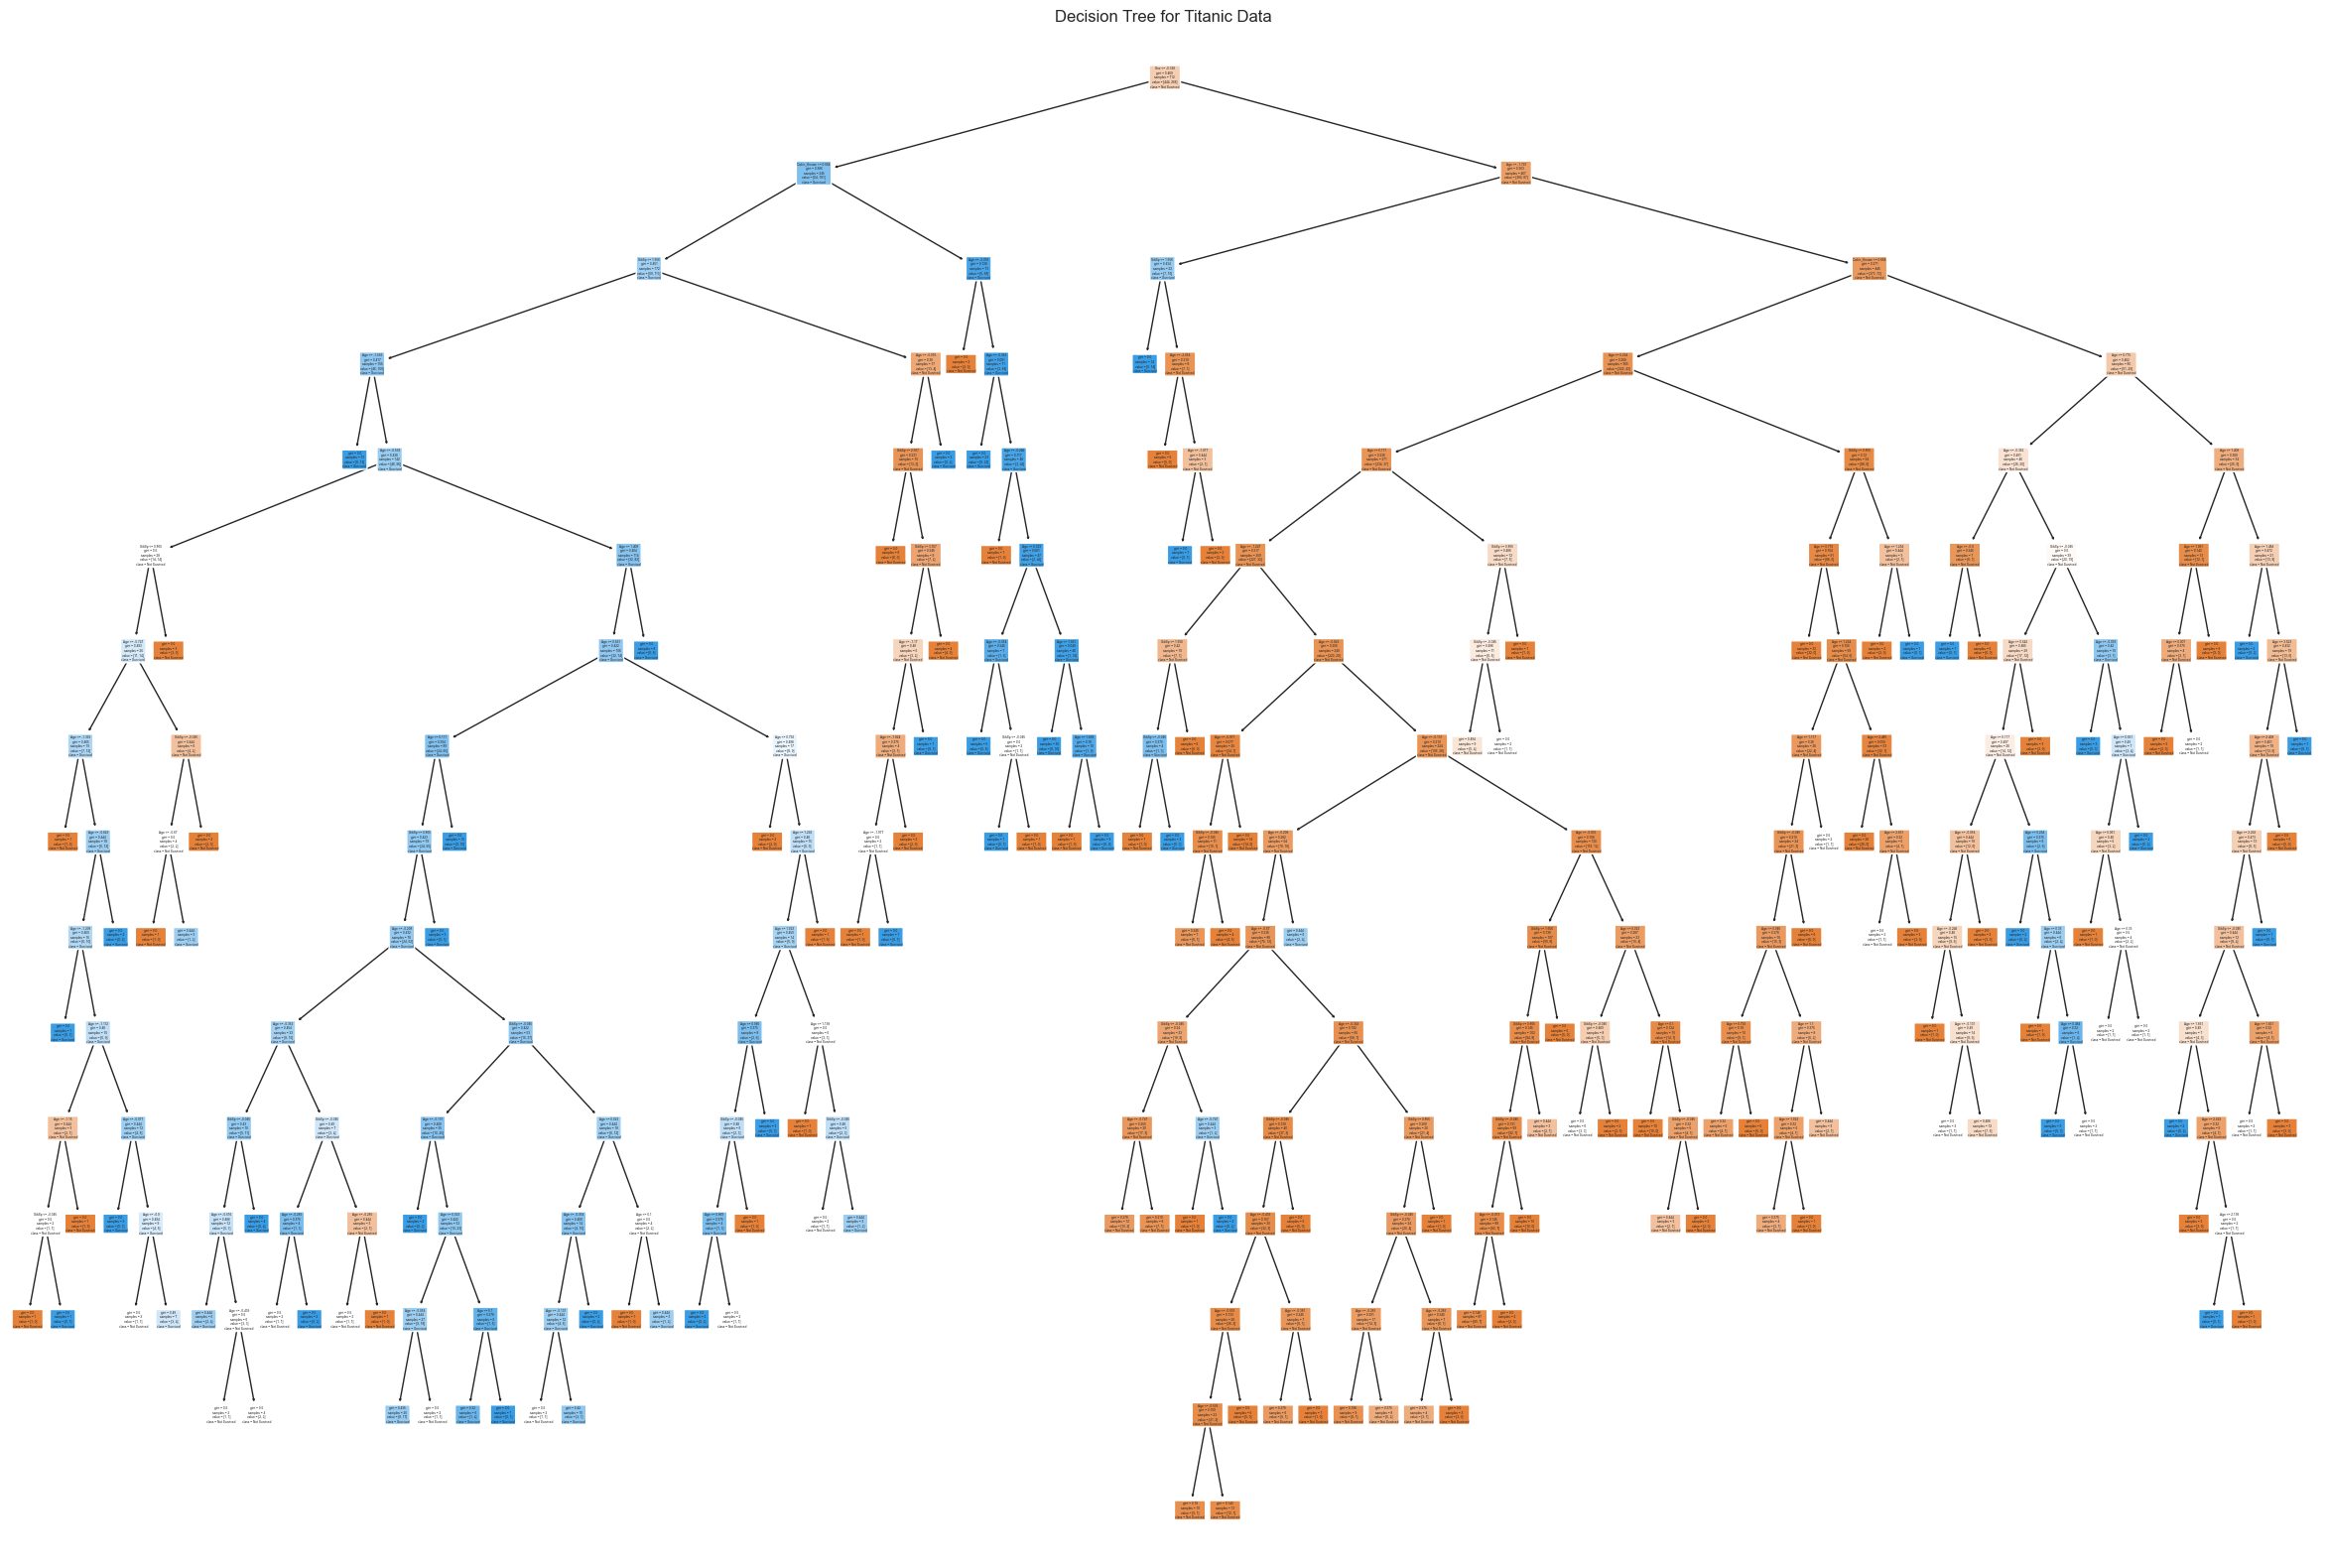

0.7988826815642458

In [115]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Splitting the dataset into training and test sets

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the features

# Initialize the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the scaled training data
dt_clf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_dt = dt_clf.predict(X_test_scaled)

# Calculate the accuracy of the model on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Plotting the Decision Tree
plt.figure(figsize=(30, 20))
plot_tree(dt_clf, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title('Decision Tree for Titanic Data')
plt.show()

# Display the accuracy of the Decision Tree model
accuracy_dt
